## ML improving model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('ml-data.csv', delimiter=',', encoding= 'unicode_escape')

In [3]:
df = pd.read_csv('final-data.csv', delimiter=',', encoding= 'unicode_escape')

In [4]:
df.head()

,Age,Race,Sex,Diagnosed,Stage,Site,Property,Tumor size,Surgery,Chemotherapy,Radiotherapy,Survive
0,15-19,White,Male,1975-1999,Regional,Bones and Joints,"$75,000+",85-115,No,No,No,Dead in 5
1,05-09,White,Male,1975-1999,Regional,Bones and Joints,"$75,000+",85-115,No,No,No,Dead in 5
2,15-19,White,Male,1975-1999,Distant,Bones and Joints,"< $60,999",85-115,No,Yes,No,Dead in 5
3,15-19,White,Male,1975-1999,Regional,Bones and Joints,"$60,000 - $74,999",85-115,No,Yes,No,Dead in 5
4,15-19,White,Male,1975-1999,Localized,Bones and Joints,"< $60,999",> 115,Yes,No,No,Dead in 5


In [4]:
df = df.drop(['Diagnosed','Months','Tumor size','COD2','COD','Malignat number','Sequence number','Id'], axis = 1)

In [8]:
df.rename(columns={'Diagnosed group':'Diagnosed',
                  'Tumor size group':'Tumor size'
                  }, inplace = True)

In [6]:
df = df.drop(['Report'], axis = 1)

In [10]:
df.loc[(df['Survive']=='Dead in 10') | (df['Survive']=='Dead in 10+'), 'Survive'] ='Dead in 5+'

In [12]:
df.loc[(df['Site']=='Kidney and Renal Pelvis'), 'Site'] = 'Other'
df.loc[(df['Age']=='00')| (df['Age']=='01-04'), 'Age'] = '00-04'

In [72]:
df['Survive'].value_counts()

Survived 5y    1775
Dead in 5y      806
Name: Survive, dtype: int64

In [68]:
df.loc[(df['Survive']!='Dead in 5'), 'Survive'] = 'Survived 5y'

In [71]:
df.loc[(df['Survive']=='Dead in 5'), 'Survive'] = 'Dead in 5y'

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

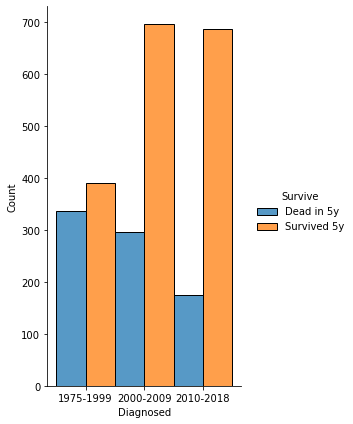

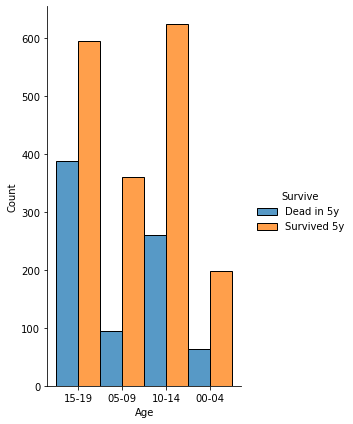

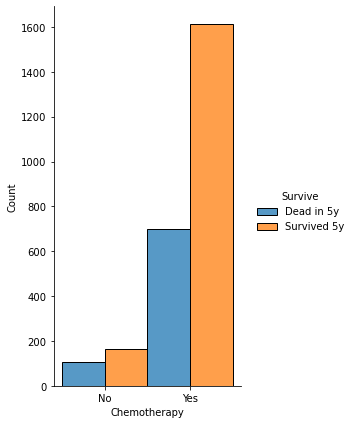

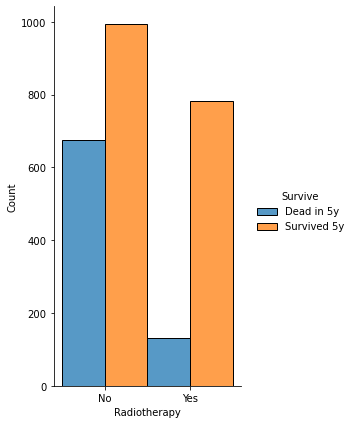

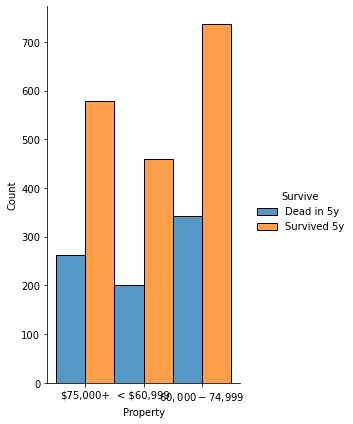

In [75]:
for column in ['Diagnosed','Age','Chemotherapy', 'Radiotherapy','Property'
                            ]:
    sns.displot(df, x=column, hue="Survive", height=6, aspect=0.6, multiple="dodge")

## Final attributes

In [76]:
df.columns

Index(['Age', 'Race', 'Sex', 'Diagnosed', 'Stage', 'Site', 'Property',
       'Tumor size', 'Surgery', 'Chemotherapy', 'Radiotherapy', 'Survive'],
      dtype='object')

### One hot Encoding - columns

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
df_ohe = df
categorical_columns = ['Age', 'Race', 'Sex','Diagnosed', 'Stage', 'Site',
       'Property', 'Tumor size', 'Surgery', 'Chemotherapy',
       'Radiotherapy']

for col in categorical_columns:
    col_ohe = pd.get_dummies(df[col], prefix=col)
    df_ohe = pd.concat((df_ohe, col_ohe), axis=1).drop(col, axis=1)
    
print(df_ohe.columns)

Index(['Survive', 'Age_00-04', 'Age_05-09', 'Age_10-14', 'Age_15-19',
       'Race_Black', 'Race_Other', 'Race_White', 'Sex_Female', 'Sex_Male',
       'Diagnosed_1975-1999', 'Diagnosed_2000-2009', 'Diagnosed_2010-2018',
       'Stage_Distant', 'Stage_Localized', 'Stage_Regional',
       'Site_Bones and Joints', 'Site_Other',
       'Site_Soft Tissue including Heart', 'Property_$60,000 - $74,999',
       'Property_$75,000+', 'Property_< $60,999', 'Tumor size_85-115',
       'Tumor size_< 85', 'Tumor size_> 115', 'Surgery_No', 'Surgery_Unknown',
       'Surgery_Yes', 'Chemotherapy_No', 'Chemotherapy_Yes', 'Radiotherapy_No',
       'Radiotherapy_Yes'],
      dtype='object')


In [79]:
print(df_ohe.columns.size)

32


### Split on training and test data

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
training, test = train_test_split(df_ohe, test_size=0.20, random_state=35)

In [82]:
features = training.drop(["Survive"], axis=1).columns

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    df_ohe[features], df_ohe['Survive'], test_size=0.20, random_state=35)

## For report

In [84]:
from sklearn.metrics import classification_report

## K means

In [85]:
from sklearn.cluster import KMeans


In [18]:
df_ohe_km = df_ohe
df_ohe_km['Survive'] = df_ohe_km['Survive'].astype('category').cat.codes
features_km = training.drop(["Survive"], axis=1).columns

In [22]:
df_ohe_km['Survive'].value_counts()

2    1610
0     806
1     165
Name: Survive, dtype: int64

In [19]:
training_km, test_km = train_test_split(df_ohe_km, test_size=0.20, random_state=35)

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(training_km)


In [21]:
kmeans.labels_

array([1, 1, 3, ..., 3, 3, 0])

In [46]:
clusters = kmeans.fit_predict(training_km)
kmeans.cluster_centers_.shape

(4, 32)

ValueError: x and y must be the same size

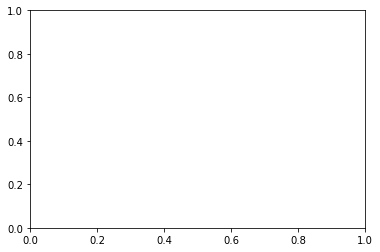

In [52]:
plt.scatter(training_km[: 0], training_km[: 1], c=kmeans,
            s=50, cmap='viridis');

## MLP learning

In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
clf_mpl = MLPClassifier(random_state=1, max_iter=300)
clf_mpl.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_mpl.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.84      0.68      0.75       174
 Survived 5y       0.85      0.93      0.89       343

    accuracy                           0.85       517
   macro avg       0.85      0.81      0.82       517
weighted avg       0.85      0.85      0.84       517



C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Linear SVM

In [88]:
from sklearn.metrics import classification_report

In [89]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear', C=0.5, degree=9)
clf_svm.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_svm.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.83      0.63      0.72       174
 Survived 5y       0.83      0.93      0.88       343

    accuracy                           0.83       517
   macro avg       0.83      0.78      0.80       517
weighted avg       0.83      0.83      0.83       517



## RBF SVM

In [90]:
clf_svm_rbf = svm.SVC(kernel='rbf')
clf_svm_rbf.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_svm_rbf.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.85      0.69      0.76       174
 Survived 5y       0.86      0.94      0.90       343

    accuracy                           0.85       517
   macro avg       0.85      0.81      0.83       517
weighted avg       0.85      0.85      0.85       517



### Select the best hyperparameter for SVM


In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = [{'kernel': ['rbf','linear'], 
               'gamma': [1e-3, 1e-5],
                'C': [1000, 1100, 1300], 
                'degree' : [1,3,6]}]
clf = GridSearchCV(svm.SVC(), param_grid, cv=2)
clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [1000, 1100, 1300], 'degree': [1, 3, 6],
                          'gamma': [0.001, 1e-05],
                          'kernel': ['rbf', 'linear']}])

In [93]:
print(clf.best_params_)

{'C': 1100, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [94]:
print(classification_report(test['Survive'], clf.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.86      0.67      0.75       174
 Survived 5y       0.85      0.94      0.89       343

    accuracy                           0.85       517
   macro avg       0.85      0.81      0.82       517
weighted avg       0.85      0.85      0.85       517



## Select the best for MLP

In [95]:
param_grid = [{'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive']}]
clf_mlp = GridSearchCV(MLPClassifier(), param_grid, cv=5)
clf_mlp.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'activation': ['tanh', 'relu'],
                          'alpha': [0.0001, 0.05],
                          'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                 (100,)],
                          'learning_rate': ['constant', 'adaptive'],
                          'solver': ['sgd', 'adam']}])

In [96]:
print(clf_mlp.best_params_)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [97]:
print(classification_report(test['Survive'], clf_mlp.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.83      0.70      0.76       174
 Survived 5y       0.86      0.93      0.89       343

    accuracy                           0.85       517
   macro avg       0.84      0.81      0.83       517
weighted avg       0.85      0.85      0.85       517



# 

## Decision tree optimisation

In [98]:
from sklearn import tree
clf_dtree = tree.DecisionTreeClassifier(max_leaf_nodes = 20, max_depth= 20)

clf_dtree.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_dtree.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.83      0.68      0.74       174
 Survived 5y       0.85      0.93      0.89       343

    accuracy                           0.84       517
   macro avg       0.84      0.80      0.82       517
weighted avg       0.84      0.84      0.84       517



In [99]:
tree_para = [{'max_leaf_nodes' : [20,25,30,35,40,45],
             'max_depth':[20,25,30,35],
              'min_samples_split': [2, 3, 4]
             }]
clf_dt = GridSearchCV(tree.DecisionTreeClassifier(), tree_para, cv=2)
clf_dt.fit(training[features], training['Survive'])

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [20, 25, 30, 35],
                          'max_leaf_nodes': [20, 25, 30, 35, 40, 45],
                          'min_samples_split': [2, 3, 4]}])

In [100]:
print(clf_dt.best_params_)

{'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_split': 2}


In [101]:
print(classification_report(test['Survive'], clf_dt.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.83      0.68      0.74       174
 Survived 5y       0.85      0.93      0.89       343

    accuracy                           0.84       517
   macro avg       0.84      0.80      0.82       517
weighted avg       0.84      0.84      0.84       517



# 

## Random forest optimisation

In [102]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=3, random_state=0)

clf_rf.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_rf.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.88      0.33      0.48       174
 Survived 5y       0.74      0.98      0.84       343

    accuracy                           0.76       517
   macro avg       0.81      0.65      0.66       517
weighted avg       0.79      0.76      0.72       517



In [ ]:
rf_para = [{'bootstrap': [True, False],
 'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}]

In [103]:
rf_para = [{
 'max_depth': [5, 30, 50],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [200, 800, 1600, 2000]}]

In [104]:
clf_rf = GridSearchCV(RandomForestClassifier(), rf_para, cv=5)
clf_rf.fit(training[features], training['Survive'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 30, 50],
                          'min_samples_leaf': [1, 2, 4],
                          'n_estimators': [200, 800, 1600, 2000]}])

In [105]:
print(clf_rf.best_params_)
print(classification_report(test['Survive'], clf_rf.predict(test[features])))

{'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 200}
              precision    recall  f1-score   support

  Dead in 5y       0.85      0.70      0.77       174
 Survived 5y       0.86      0.94      0.90       343

    accuracy                           0.86       517
   macro avg       0.86      0.82      0.83       517
weighted avg       0.86      0.86      0.85       517



# 

## KNN optimization

In [106]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

clf_knn.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_knn.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.69      0.53      0.60       174
 Survived 5y       0.79      0.88      0.83       343

    accuracy                           0.76       517
   macro avg       0.74      0.70      0.72       517
weighted avg       0.75      0.76      0.75       517



In [116]:
knn_para = [{
    'n_neighbors' : [17,19,21,23],
    'leaf_size' : [7,9,11],
}]

In [117]:
clf_knn = GridSearchCV(KNeighborsClassifier(), knn_para, cv=2)
clf_knn.fit(training[features], training['Survive'])

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [7, 9, 11],
                          'n_neighbors': [17, 19, 21, 23]}])

In [118]:
print(clf_knn.best_params_)
print(classification_report(test['Survive'], clf_knn.predict(test[features])))

{'leaf_size': 9, 'n_neighbors': 19}
              precision    recall  f1-score   support

  Dead in 5y       0.86      0.58      0.69       174
 Survived 5y       0.82      0.95      0.88       343

    accuracy                           0.83       517
   macro avg       0.84      0.77      0.79       517
weighted avg       0.83      0.83      0.82       517



# 

## Naive Bayes Gaussian optimization

In [119]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()

clf_gnb.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_gnb.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.69      0.70      0.70       174
 Survived 5y       0.85      0.84      0.85       343

    accuracy                           0.79       517
   macro avg       0.77      0.77      0.77       517
weighted avg       0.80      0.79      0.80       517



# 

# Logistic regression optimization

In [120]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()

clf_log.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_log.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.80      0.59      0.68       174
 Survived 5y       0.82      0.92      0.87       343

    accuracy                           0.81       517
   macro avg       0.81      0.76      0.77       517
weighted avg       0.81      0.81      0.80       517



In [138]:
log_para = [{             
            'C': [1,5,10,15,25],
             'tol' : [1e-6,1e-5, 1e-4],
             'max_iter' : [10,15,20,25]
            }]

In [139]:
clf_log = GridSearchCV(LogisticRegression(), log_para, cv=2)
clf_log.fit(training[features], training['Survive'])

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 5, 10, 15, 25], 'max_iter': [10, 15, 20, 25],
                          'tol': [1e-06, 1e-05, 0.0001]}])

In [140]:
print(clf_log.best_params_)
print(classification_report(test['Survive'], clf_log.predict(test[features])))

{'C': 10, 'max_iter': 15, 'tol': 1e-06}
              precision    recall  f1-score   support

  Dead in 5y       0.79      0.59      0.68       174
 Survived 5y       0.82      0.92      0.87       343

    accuracy                           0.81       517
   macro avg       0.80      0.76      0.77       517
weighted avg       0.81      0.81      0.80       517



# 

# Ada boots optimization

In [141]:
from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier(n_estimators=76, random_state=0)

clf_ab.fit(training[features], training['Survive'])
print(classification_report(test['Survive'], clf_ab.predict(test[features])))

              precision    recall  f1-score   support

  Dead in 5y       0.79      0.57      0.66       174
 Survived 5y       0.81      0.92      0.86       343

    accuracy                           0.80       517
   macro avg       0.80      0.75      0.76       517
weighted avg       0.80      0.80      0.79       517



In [142]:
abc = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

clf_ada = GridSearchCV(abc, parameters,verbose=3,scoring='f1_micro',n_jobs=-1)
clf_ada.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  8.5min finished


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1_micro', verbose=3)

In [143]:
print(clf_ada.best_params_)
print(classification_report(test['Survive'], clf_ada.predict(test[features])))

{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.01, 'n_estimators': 250}
              precision    recall  f1-score   support

  Dead in 5y       0.86      0.72      0.78       174
 Survived 5y       0.87      0.94      0.90       343

    accuracy                           0.87       517
   macro avg       0.87      0.83      0.84       517
weighted avg       0.87      0.87      0.86       517



# 

## XGBoots

In [144]:
df_ohe_x = df_ohe
df_ohe_x['Survive'] = df_ohe_x['Survive'].astype('category').cat.codes
training1, test1 = train_test_split(df_ohe_x, test_size=0.25, random_state=35)

In [145]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

training1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in training1.columns.values]
test1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test1.columns.values]


In [146]:
features1 = training1.drop(["Survive"], axis=1).columns

In [147]:
import xgboost as xgb

In [148]:
dtrain = xgb.DMatrix(training1[features1], training1['Survive'])
dtest = xgb.DMatrix(test1[features1], test1['Survive'])

In [163]:
params = {
    'max_depth':6,
    'min_child_weight': 11,
    'eta':.3,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'objective':'multi:softmax',
    'num_class': 3,
    'n_estimators': 20,
    'eval_metric' : 'merror',
}

In [164]:
model = xgb.train(
    params,
    dtrain,
    #evals=[(dtest, "Test")], ovde treba koristiti validacioni skup
    evals=[(dtrain, "Train")],
    #early_stopping_rounds=35,
    num_boost_round=1100
)

[00:20:06] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Train-merror:0.19845
[1]	Train-merror:0.18863
[2]	Train-merror:0.18036
[3]	Train-merror:0.18036
[4]	Train-merror:0.17674
[5]	Train-merror:0.17158
[6]	Train-merror:0.17003
[7]	Train-merror:0.16899
[8]	Train-merror:0.16537
[9]	Train-merror:0.16641
[10]	Train-merror:0.16848
[11]	Train-merror:0.16589
[12]	Train-merror:0.16279
[13]	Train-merror:0.16176
[14]	Train-merror:0.15917
[15]	Train-merror:0.16279
[16]	Train-merror:0.15969
[17]	Train-merror:0.15659
[18]	Train-merror:0.15504
[19]	Train-merror:0.15607
[20]	Train-merror:0.15452
[21]	Train-merror:0.15659
[22]	Train-merror:0.15504
[23]	Train-merror:0.15090
[24]	Train-merror:0.15194
[25]	Train-merror:0.14884
[2

[296]	Train-merror:0.09664
[297]	Train-merror:0.09612
[298]	Train-merror:0.09561
[299]	Train-merror:0.09561
[300]	Train-merror:0.09664
[301]	Train-merror:0.09612
[302]	Train-merror:0.09819
[303]	Train-merror:0.09819
[304]	Train-merror:0.09767
[305]	Train-merror:0.09664
[306]	Train-merror:0.09767
[307]	Train-merror:0.09819
[308]	Train-merror:0.09922
[309]	Train-merror:0.09612
[310]	Train-merror:0.09612
[311]	Train-merror:0.09509
[312]	Train-merror:0.09664
[313]	Train-merror:0.09457
[314]	Train-merror:0.09509
[315]	Train-merror:0.09561
[316]	Train-merror:0.09457
[317]	Train-merror:0.09354
[318]	Train-merror:0.09457
[319]	Train-merror:0.09561
[320]	Train-merror:0.09457
[321]	Train-merror:0.09767
[322]	Train-merror:0.09767
[323]	Train-merror:0.09612
[324]	Train-merror:0.09561
[325]	Train-merror:0.09457
[326]	Train-merror:0.09302
[327]	Train-merror:0.09354
[328]	Train-merror:0.09199
[329]	Train-merror:0.09147
[330]	Train-merror:0.09199
[331]	Train-merror:0.09096
[332]	Train-merror:0.08889
[

[600]	Train-merror:0.08269
[601]	Train-merror:0.08062
[602]	Train-merror:0.08269
[603]	Train-merror:0.08320
[604]	Train-merror:0.08424
[605]	Train-merror:0.08424
[606]	Train-merror:0.08320
[607]	Train-merror:0.08165
[608]	Train-merror:0.08320
[609]	Train-merror:0.08165
[610]	Train-merror:0.08217
[611]	Train-merror:0.08114
[612]	Train-merror:0.08165
[613]	Train-merror:0.08114
[614]	Train-merror:0.08114
[615]	Train-merror:0.08217
[616]	Train-merror:0.08217
[617]	Train-merror:0.08320
[618]	Train-merror:0.08320
[619]	Train-merror:0.08165
[620]	Train-merror:0.08320
[621]	Train-merror:0.08320
[622]	Train-merror:0.08269
[623]	Train-merror:0.08165
[624]	Train-merror:0.08217
[625]	Train-merror:0.08165
[626]	Train-merror:0.08165
[627]	Train-merror:0.08269
[628]	Train-merror:0.08269
[629]	Train-merror:0.08320
[630]	Train-merror:0.08372
[631]	Train-merror:0.08269
[632]	Train-merror:0.08217
[633]	Train-merror:0.08269
[634]	Train-merror:0.08424
[635]	Train-merror:0.08269
[636]	Train-merror:0.08320
[

[904]	Train-merror:0.07235
[905]	Train-merror:0.07132
[906]	Train-merror:0.07080
[907]	Train-merror:0.06977
[908]	Train-merror:0.07132
[909]	Train-merror:0.07132
[910]	Train-merror:0.07132
[911]	Train-merror:0.06977
[912]	Train-merror:0.07080
[913]	Train-merror:0.06873
[914]	Train-merror:0.06977
[915]	Train-merror:0.06977
[916]	Train-merror:0.06925
[917]	Train-merror:0.06873
[918]	Train-merror:0.07028
[919]	Train-merror:0.07028
[920]	Train-merror:0.06925
[921]	Train-merror:0.07080
[922]	Train-merror:0.07028
[923]	Train-merror:0.06925
[924]	Train-merror:0.07080
[925]	Train-merror:0.06925
[926]	Train-merror:0.06925
[927]	Train-merror:0.06925
[928]	Train-merror:0.06925
[929]	Train-merror:0.06977
[930]	Train-merror:0.06822
[931]	Train-merror:0.07080
[932]	Train-merror:0.07028
[933]	Train-merror:0.07183
[934]	Train-merror:0.07080
[935]	Train-merror:0.06873
[936]	Train-merror:0.06925
[937]	Train-merror:0.06977
[938]	Train-merror:0.06822
[939]	Train-merror:0.06977
[940]	Train-merror:0.06925
[

In [165]:
print(classification_report(test1['Survive'], model.predict(dtest).astype(int)))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       206
           1       0.86      0.91      0.89       440

    accuracy                           0.84       646
   macro avg       0.82      0.80      0.81       646
weighted avg       0.84      0.84      0.84       646



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

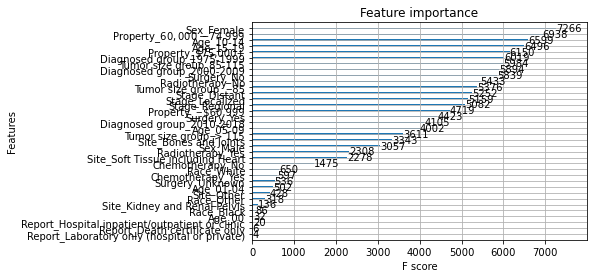

In [98]:
from xgboost import plot_importance

plot_importance(model)

# 

### Using Random forest to select best parameters

In [166]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

Optimalan broj atributa : 10


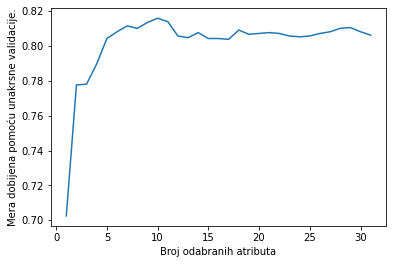

In [167]:
dtree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 40, min_samples_split = 2, max_depth= 30)
rfecv = RFECV(estimator=dtree_clf, cv=StratifiedKFold(2), scoring='f1_micro')

rfecv.fit(training[features], training['Survive'])

print("Optimalan broj atributa : %d" % rfecv.n_features_)

#Prikazujemo broj atributa i rezultate unakrsne validacije 
plt.figure()
plt.xlabel("Broj odabranih atributa")
plt.ylabel("Mera dobijena pomoću unakrsne validacije.")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [175]:

features[rfecv.support_]

Index(['Diagnosed_1975-1999', 'Diagnosed_2000-2009', 'Stage_Distant',
       'Stage_Localized', 'Property_$75,000+', 'Tumor size_85-115',
       'Tumor size_> 115', 'Surgery_No', 'Chemotherapy_Yes',
       'Radiotherapy_No'],
      dtype='object')

# 

## Select best parameters for prediction

In [176]:
from sklearn.feature_selection import SelectKBest, f_classif
#f_classif, Compute the ANOVA F-value for the provided sample. - savetuje se kada su numericki atributi, a kategorijalna klasa

sb = SelectKBest(score_func=f_classif, k=30).fit(training[features], training['Survive'])
train_x_vectors_new = sb.transform(training[features])
sb.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [177]:
df_ohe.columns[sb.get_support(indices=True)].tolist()

['Survive',
 'Age_00-04',
 'Age_05-09',
 'Age_10-14',
 'Age_15-19',
 'Race_Other',
 'Race_White',
 'Sex_Female',
 'Sex_Male',
 'Diagnosed_1975-1999',
 'Diagnosed_2000-2009',
 'Diagnosed_2010-2018',
 'Stage_Distant',
 'Stage_Localized',
 'Stage_Regional',
 'Site_Bones and Joints',
 'Site_Other',
 'Site_Soft Tissue including Heart',
 'Property_$60,000 - $74,999',
 'Property_$75,000+',
 'Property_< $60,999',
 'Tumor size_85-115',
 'Tumor size_< 85',
 'Tumor size_> 115',
 'Surgery_No',
 'Surgery_Unknown',
 'Surgery_Yes',
 'Chemotherapy_No',
 'Chemotherapy_Yes',
 'Radiotherapy_No']

In [178]:
df.to_csv('final-data.csv', index= False)

In [182]:
from sklearn.calibration import calibration_curve

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

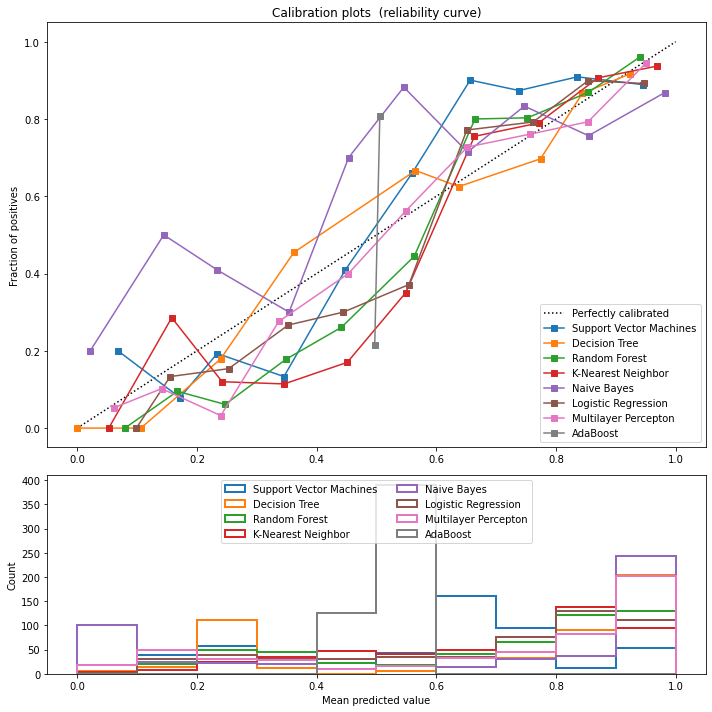

In [183]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for c, name in [(clf, 'Support Vector Machines'),
                  (clf_dt, 'Decision Tree'),
                  (clf_rf, 'Random Forest'),
                  (clf_knn, 'K-Nearest Neighbor'),
                  (clf_gnb, 'Naive Bayes'),
                  (clf_log, 'Logistic Regression'),
                  (clf_mlp, 'Multilayer Percepton'),
                  (clf_ab, 'AdaBoost'),]:
    c.fit(X_train, y_train)
    if hasattr(c, "predict_proba"):
        prob_pos = c.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = c.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()